In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def load(dataset, test_name):
    def extract(line):
        line_split = line.split()
        
        name = line_split[0]
        thrpt = float(line_split[3])
        err = float(line_split[5])
    
        return name, thrpt, err
    
    contracts = [0, 10, 100, 500]
    
    with open(f'{dataset}.txt') as f:
        lines = f.readlines()
        df = pd.DataFrame([extract(line) for line in lines[1:]], columns=['Test', 'Thrpt', 'Err'])
        df = df[df['Test'].str.contains(test_name)]
        df = df.assign(Contracts=contracts[:df.shape[0]])
        
        return df

In [17]:
import seaborn as sns
sns.set_style('whitegrid')
# sns.set()

def plot(test_name, title):
    coco = load('coco', test_name)
    cofoja = load('cofoja', test_name)

    plt.figure(figsize=(10, 6))

    plt.plot(coco['Contracts'], coco['Thrpt'], label='coco', lw=2, marker="o", mew=2)
    plt.plot(cofoja['Contracts'], cofoja['Thrpt'], label='cofoja', lw=2, marker="x", mew=2)
    
    plt.xlabel('Number of contracts', fontsize=20)
    plt.ylabel('Throughput (op/s)', fontsize=20)
    
    plt.title(title + '\n', fontsize=22)
    plt.legend(fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    
    plt.savefig(f'{test_name}.pdf')
    
    plt.show()


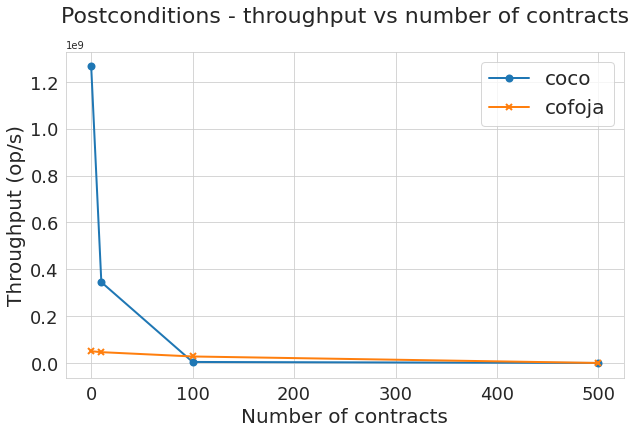

In [18]:
plot('Ensures', 'Postconditions - throughput vs number of contracts')

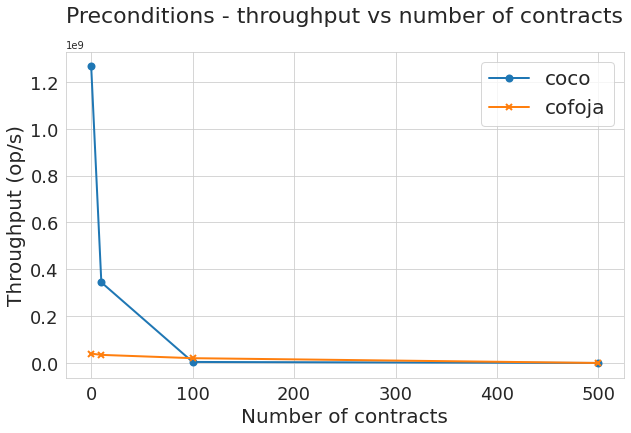

In [19]:
plot('Requires', 'Preconditions - throughput vs number of contracts')

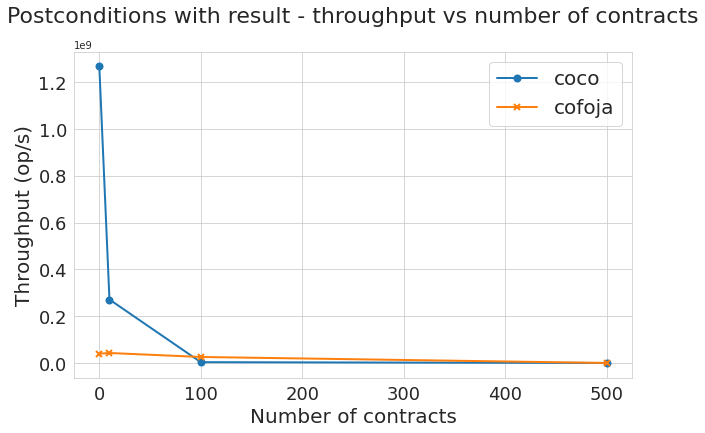

In [20]:
plot('Result', 'Postconditions with result - throughput vs number of contracts')

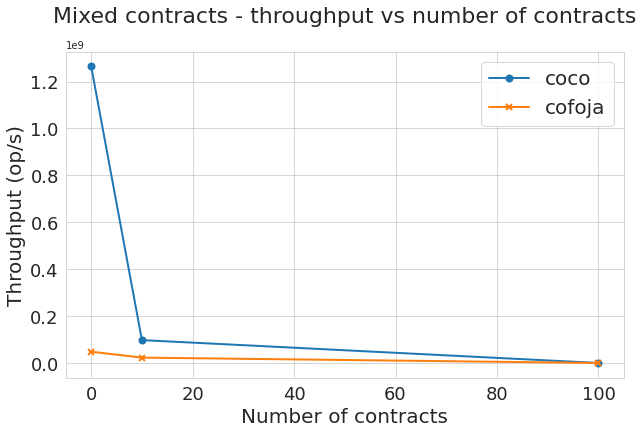

In [21]:
plot('Mixed', 'Mixed contracts - throughput vs number of contracts')

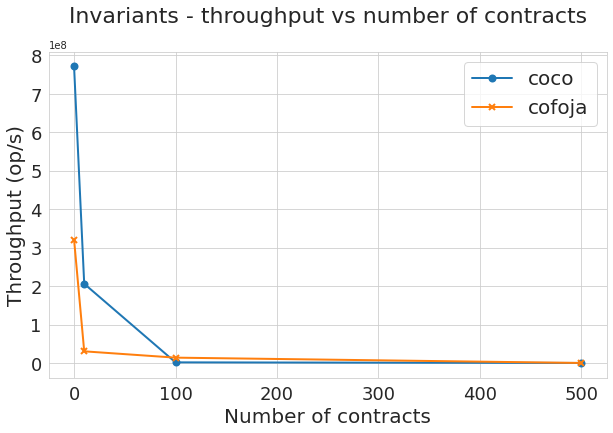

In [22]:
plot('Invariant', 'Invariants - throughput vs number of contracts')

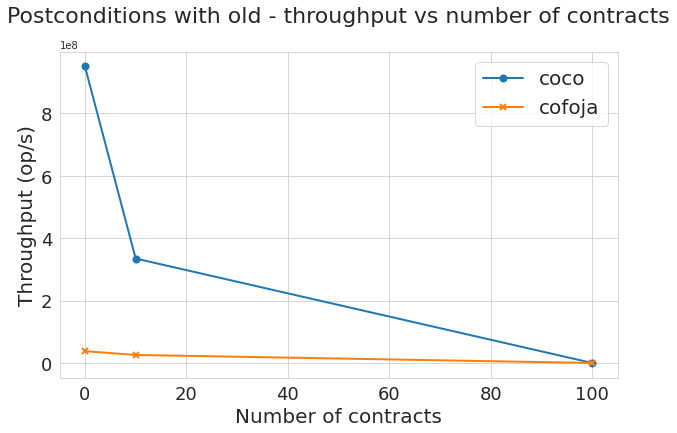

In [23]:
plot('Old', 'Postconditions with old - throughput vs number of contracts')